In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [3]:
# Import MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
[n_samples_train, width, height] = np.shape(X_train)
[n_samples_test, width, height] = np.shape(X_test)

In [5]:
X_train = X_train.reshape([n_samples_train, width*height])
X_test =X_test.reshape([n_samples_test, width*height])



0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


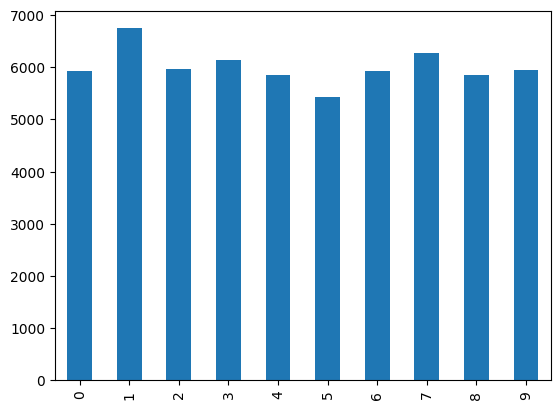

In [6]:
y_train.dtype  
#dtype('uint8')
y_train = pd.Series(y_train)
count_y = y_train.value_counts().sort_index()
count_y.plot(kind='bar')
print(count_y)

<Axes: >

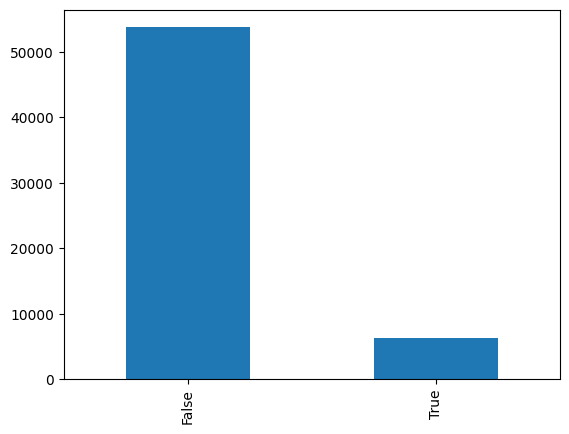

In [7]:
y_train = (y_train==7)
y_test= (y_test==7)

y_train = pd.Series(y_train)
count_y = y_train.value_counts().sort_index()
count_y.plot(kind='bar')

In [11]:
model = LogisticRegression(random_state=42,max_iter=100)
classifier = model.fit(X_train, y_train)
# Predict labels
y_pred = classifier.predict(X_test)

accuracy_score(y_pred,y_test)



C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9833

In [18]:
y_pred_prob = classifier.predict_proba(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

# Y_test is a binary vector of the actual class label with dim (N, 1) where N is the number of samples;
# y_test_est is a binary vector of the estimated class label with dim (N, 1).
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is {}'.format(cm))

confusion matrix is [[8900   72]
 [  95  933]]


(0.0, 1.0, 0.0, 1.0)

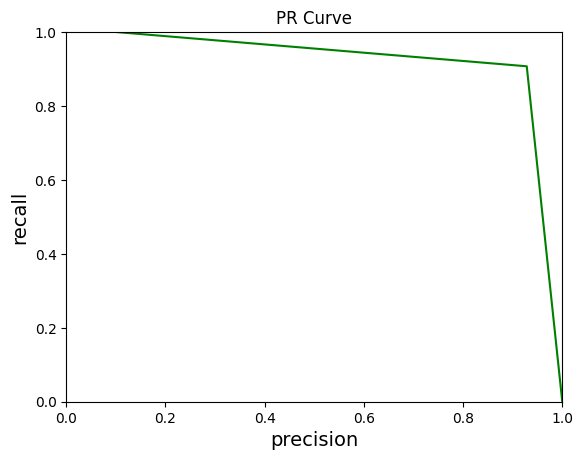

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precisions, recalls, 'g')
plt.xlabel('precision', fontsize=14)
plt.ylabel('recall', fontsize=14)
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

fps, tps, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

roc auc score = 0.9497812910377464


(0.0, 1.0, 0.0, 1.0)

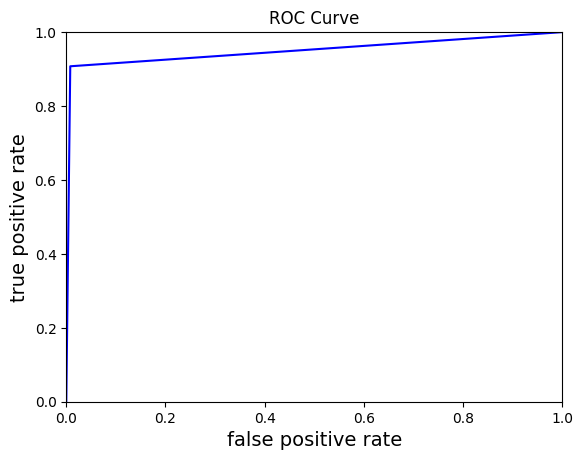

In [23]:
print('roc auc score = {}'.format(roc_auc))

plt.plot(fps, tps, 'b')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])